In [1]:
from sympy import *
init_printing(use_latex=true)

- Slit width: $\sigma_0$
- Slit distance: $Y$
- Wavenumber along $x$ direction: $k_{x}$

In [4]:
Y = symbols("Y", real=True)
σ0 = symbols("sigma_0", real=True)
t = symbols("t", real=True)
y = symbols("y", real=True)
x = y*t
vx = symbols("v_x", real=True)
σt = σ0*( 1 + (I*t)/(2*σ0**2) )
N = symbols("N", real=True)

In [5]:
def wavefunction(slit_distance, slit_width, st, velx, N, x, y, t):
    return N*exp((-((y-slit_distance)**2)/(4*slit_width*st)) + I*(velx*x-((t*velx**2)/2)))

def calc_psi(slit_distance, slit_width, st, velx, N, x, y, t):
    return wavefunction(slit_distance, slit_width, st, velx, N, x, y, t) + \
           wavefunction(slit_distance, slit_width, st, velx, N, x, -y, t)

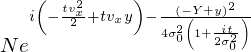

In [7]:
psi1 = wavefunction(Y, σ0, σt, vx, N, x, y, t)
psi1

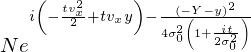

In [16]:
psi2 = wavefunction(Y, σ0, σt, vx, N, x, -y, t)
psi2

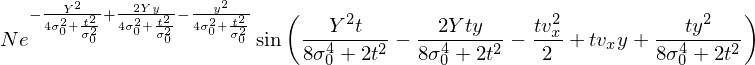

In [8]:
im(psi1)

In [9]:
PSI = calc_psi(Y, σ0, σt, vx, N, x, y, t)

In [14]:
ydot = PSI.diff(y)/PSI
ydot_simple = simplify(ydot)

In [15]:
print(ydot_simple)

(Y*exp(2*Y*y/(2*sigma_0**2 + I*t)) - Y + 2*I*sigma_0**2*t*v_x*exp(2*Y*y/(2*sigma_0**2 + I*t)) + 2*I*sigma_0**2*t*v_x - t**2*v_x*exp(2*Y*y/(2*sigma_0**2 + I*t)) - t**2*v_x - y*exp(2*Y*y/(2*sigma_0**2 + I*t)) - y)/(2*sigma_0**2*exp(2*Y*y/(2*sigma_0**2 + I*t)) + 2*sigma_0**2 + I*t*exp(2*Y*y/(2*sigma_0**2 + I*t)) + I*t)


# OLD STUFFS

The wave that leave the slit:

$$
\psi(x,y,t) = \left( 2\pi\sigma_{t}^2 \right)^{(-1/4)}
\exp\left[
\frac{(y - Y)^2}{4\sigma_{0}\sigma_{t}} +
\text{i}\left(
  k_{x} x - \frac{k_{x}^2 t}{2}
  \right)
\right]
$$

with:

$$
\sigma_{t} = \sigma_{0} \left( 1 + \frac{\text{i}t}{2\sigma_{0}^{2}} \right)
$$

In [12]:
I*(k_x*x - k_x**2 * t)

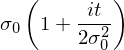

In [14]:
sigma_t = sigma_0*(1 + I*t/(2*sigma_0**2))
sigma_t

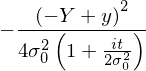

In [19]:
term1 = -(y - Y)**2/(4*sigma_0*sigma_t)
term1

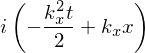

In [20]:
term2 = I*( k_x*x - k_x**2 * t / 2)
term2

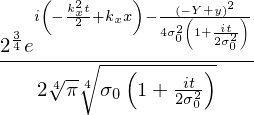

In [21]:
psi_xyt = (2*pi*sigma_t)**Rational(-1,4) * exp( term1 + term2 )
psi_xyt

Trajectories

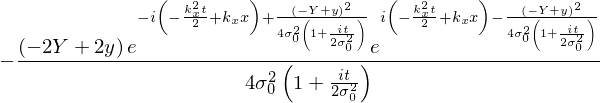

In [25]:
ydot = psi_xyt.diff(y)/psi_xyt
ydot

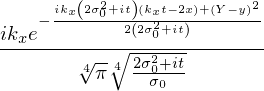

In [30]:
simplify( psi_xyt.diff(x) )

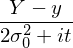

In [26]:
simplify(ydot)

Is $k_x$ and $k_y$ equal to velocity ?

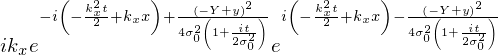

In [27]:
xdot = psi_xyt.diff(x)/psi_xyt
xdot

In [28]:
simplify(xdot)

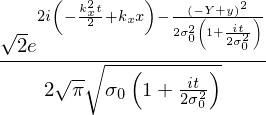

In [31]:
psi2 = psi_xyt**2
psi2

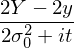

In [32]:
simplify( psi2.diff(y)/psi2 )